# Network Creation

Let's create a small Neural Network with 3 hidden layers for testing

In [1]:
import numpy as np
import pandas as pd
from nn_utils import *

In [2]:
n_hidden_layers = 3
n_neurons = 5
n_outputs = 3
n_inputs = 10

net = NeuralNetwork()
net.add_input_layer(10)

net.add_hidden_layer(10, 5)
net.add_hidden_layer(5, 4)
net.add_hidden_layer(4, 4)
net.add_output_layer(4, 3)


print(net)
print(net.number_of_nodes())

INPUT LAYER: 
NODE 0 OUTPUT = 0.0
NODE 1 OUTPUT = 0.0
NODE 2 OUTPUT = 0.0
NODE 3 OUTPUT = 0.0
NODE 4 OUTPUT = 0.0
NODE 5 OUTPUT = 0.0
NODE 6 OUTPUT = 0.0
NODE 7 OUTPUT = 0.0
NODE 8 OUTPUT = 0.0
NODE 9 OUTPUT = 0.0

LAYER 0 
NODE 0 WEIGHTS = -0.26428040313599094, -0.12974693365415016, 0.6251427176854496, 0.14746740724841015, 0.0052012274630180615, -0.7876168079330771, -0.8582210337885052, 0.4634258126420587, -0.03425085194995254, 0.4043384238453113,  BIAS = 0.0
NODE 1 WEIGHTS = -0.004661049438207553, -0.15940147244511632, -0.08128344640510242, 0.5858687339503281, 0.2747493001803566, 0.465332553894517, -0.3740766647999259, 0.30243471360183766, 0.06598015708587827, 0.46977203994448374,  BIAS = 0.0
NODE 2 WEIGHTS = 0.497877757235257, -0.16031018568095723, 0.06397498335265334, -0.025872817735197368, -0.2692074488605688, 0.32582510159593786, -0.03557810068963002, 0.42010575143130596, 0.029169706582303313, 0.09306820561171458,  BIAS = 0.0
NODE 3 WEIGHTS = -0.055402818707361905, -0.36362960678

In [3]:
col_names = ('Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6',
             'Input7', 'Input8', 'Input9', 'Input10', 'TARGET_x', 'TARGET_y', 'TARGET_z')
data = pd.read_csv("../ML-23-PRJ-Package/ML-CUP23-TR.csv",
                   skiprows=7, usecols=[i for i in range(1, 14)], names=col_names)

data

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
0,-0.917280,-0.712727,-0.989904,0.992819,0.993649,0.995543,0.711074,0.407645,-0.688548,0.616890,7.897453,-35.936382,21.077147
1,-0.858784,0.998755,-0.998396,0.999909,0.316503,-0.951897,-0.163139,0.980982,0.661759,-0.800155,-9.330632,19.901571,6.069154
2,-0.990441,0.958726,-0.998675,0.997216,0.987166,0.356483,-0.279689,0.599163,-0.684630,0.922901,14.849400,3.374090,19.667479
3,0.937117,0.984474,-0.612420,0.999812,0.728623,-0.539962,-0.165939,0.999352,-0.921444,-0.974766,-46.591854,13.734777,17.953600
4,-0.906628,-0.884567,-0.932487,0.941037,0.978134,0.998179,0.749606,-0.590599,-0.508268,0.691798,8.217500,-45.885254,14.894251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.803560,-0.878859,-0.978391,0.957539,0.996655,0.996924,-0.226305,0.097814,-0.922666,0.934153,15.389553,-41.068806,27.513502
996,0.718841,0.995748,-0.942678,0.999929,0.747763,-0.808726,0.176132,0.999100,-0.753970,-0.969009,-36.228770,13.067430,11.672133
997,-0.977912,-0.971108,0.956233,-0.979524,0.222033,0.986609,0.658273,-0.987310,0.937697,0.143420,7.265506,-53.497242,2.815666
998,0.284803,-0.988684,-0.427197,0.883317,0.993302,0.999500,-0.019456,-0.648110,-0.955231,0.901298,5.545274,-63.348396,27.989340



# Preparing Dataframe
i.e. creating the training set by removing non-training columns


In [4]:
# shuffle data
data = data.sample(frac=1)

In [5]:
data[:100]

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
465,-0.996906,0.975292,-0.999590,0.997308,0.857188,-0.706998,0.415640,-0.338966,0.715249,0.929670,12.893179,3.868865,1.135122
952,0.860756,-0.988601,0.641187,0.853680,0.995145,0.999614,0.476670,-0.370993,-0.959837,0.508617,-7.000387,-69.381220,28.419664
883,-0.826947,-0.994802,0.986861,-0.997935,0.857963,0.994888,0.713875,-0.996894,0.070142,0.868664,12.276869,-69.941650,2.962818
103,-0.587713,-0.322812,-0.988517,0.994104,0.998792,0.991993,-0.367209,0.910176,-0.966309,0.644819,9.995930,-22.755463,33.364937
340,-0.995151,0.992387,-0.999513,0.999562,0.784210,-0.811411,0.656836,0.317082,0.613851,0.812395,7.300842,5.234912,0.986290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.993746,0.660138,-0.997551,0.998398,0.953945,0.842109,0.900288,0.429550,0.408043,0.399159,6.017330,-15.992338,8.422744
32,0.899858,-0.977424,0.961999,-0.993166,0.220633,0.927075,0.185541,0.093989,0.809384,-0.977865,-32.183514,-43.136726,10.173071
524,-0.987962,0.990669,-0.999071,0.999851,0.973366,-0.135422,0.623435,0.919091,-0.195228,0.022779,2.460534,4.230272,12.612555
306,0.997196,0.519527,0.974432,0.598556,-0.879758,0.334482,-0.756348,0.993122,0.491890,-0.998804,-63.792583,-2.934901,16.971317


total Error pre-training = 1135.7221439824868


Epoch = 1, total Error post-training = 1095.0715079298952
Epoch = 2, total Error post-training = 1009.281639476276
Epoch = 3, total Error post-training = 860.6099063652688
Epoch = 4, total Error post-training = 668.7333547955901
Epoch = 5, total Error post-training = 547.2121702358152
Epoch = 6, total Error post-training = 533.6653766350865
Epoch = 7, total Error post-training = 554.3751513536295
Epoch = 8, total Error post-training = 551.2310155629758
Epoch = 9, total Error post-training = 527.5726223975578
Epoch = 10, total Error post-training = 534.5719329975904
Epoch = 11, total Error post-training = 486.8504555704041
Epoch = 12, total Error post-training = 500.30718873441697
Epoch = 13, total Error post-training = 467.28188068152383
Epoch = 14, total Error post-training = 469.8297969667656
Epoch = 15, total Error post-training = 444.14717045498884
Epoch = 16, total Error post-training = 445.8513020311098
Epoch = 17, total Error post-training = 422.6950360155719
Epoch = 18, total E

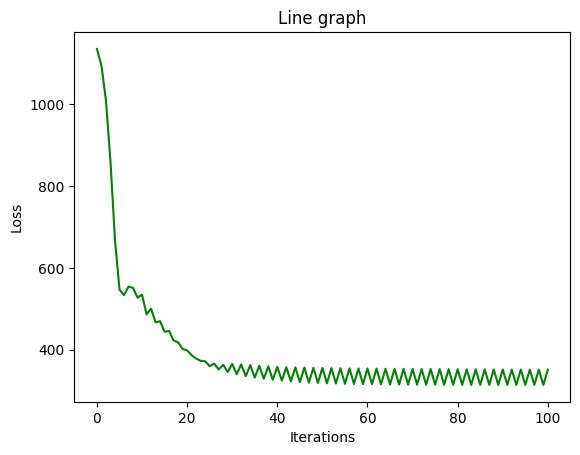

In [6]:
tr_data_X = data[['Input1', 'Input2', 'Input3', 'Input4',
                  'Input5', 'Input6', 'Input7', 'Input8', 'Input9', 'Input10']]

tr_data_Y = data[['TARGET_x', 'TARGET_y', 'TARGET_z']]

# act_fun possible values: "relu", "leaky_relu", "tanh", "sigmoid"

losses = net.train(tr_data_X, tr_data_Y, epochs=100,
                 eta=0.01, clip_value=10000, act_fun="relu")
#print(net)
#print(net.input_layer.weights)

plot_loss(losses)


In [7]:
np.dot(net.hidden_layers[0].output, net.hidden_layers[1].weights)

array([0.2858139 , 0.93749202, 0.03090241, 0.73434327])

In [8]:
net.output_layer.output

array([-4.43414461, -3.45833897,  1.26270719])

In [9]:
for row, label in zip(tr_data_X.itertuples(index=False, name=None), tr_data_Y.itertuples(index=False, name=None)):
    # Forward propagation
    net.forwardPropagation( row, label, act_fun = "relu")
    print(np.array(label))
    print(net.output_layer.output)
    break

[12.893179   3.8688653  1.135122 ]
[ 0.86627818 -0.93761613  0.42179351]


In [10]:
a = np.array([10, -3])

In [11]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

In [12]:
leaky_relu(a)

array([10.  , -0.03])

In [13]:
def clip_gradients(gradients, clip_value):
    clipped_gradients = []
    for gradient in gradients:
        clipped_gradient = np.clip(gradient, -clip_value, clip_value)
        clipped_gradients.append(clipped_gradient)
    return clipped_gradients

In [14]:
data[:100]

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
465,-0.996906,0.975292,-0.999590,0.997308,0.857188,-0.706998,0.415640,-0.338966,0.715249,0.929670,12.893179,3.868865,1.135122
952,0.860756,-0.988601,0.641187,0.853680,0.995145,0.999614,0.476670,-0.370993,-0.959837,0.508617,-7.000387,-69.381220,28.419664
883,-0.826947,-0.994802,0.986861,-0.997935,0.857963,0.994888,0.713875,-0.996894,0.070142,0.868664,12.276869,-69.941650,2.962818
103,-0.587713,-0.322812,-0.988517,0.994104,0.998792,0.991993,-0.367209,0.910176,-0.966309,0.644819,9.995930,-22.755463,33.364937
340,-0.995151,0.992387,-0.999513,0.999562,0.784210,-0.811411,0.656836,0.317082,0.613851,0.812395,7.300842,5.234912,0.986290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.993746,0.660138,-0.997551,0.998398,0.953945,0.842109,0.900288,0.429550,0.408043,0.399159,6.017330,-15.992338,8.422744
32,0.899858,-0.977424,0.961999,-0.993166,0.220633,0.927075,0.185541,0.093989,0.809384,-0.977865,-32.183514,-43.136726,10.173071
524,-0.987962,0.990669,-0.999071,0.999851,0.973366,-0.135422,0.623435,0.919091,-0.195228,0.022779,2.460534,4.230272,12.612555
306,0.997196,0.519527,0.974432,0.598556,-0.879758,0.334482,-0.756348,0.993122,0.491890,-0.998804,-63.792583,-2.934901,16.971317
